In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# convert display of scientific compute to float
pd.options.display.float_format = '{:.2f}'.format

# Read in the data
data = pd.read_csv('../notebooks/data/merged_inputed_data.csv')

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X, y = data.drop('CNT', axis=1), data['CNT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_withconstant = sm.add_constant(X_train)

# instantiate model
model = sm.OLS(y_train, X_withconstant)

# fit model
results = model.fit()

# predictions
y_preds = results.predict(X_withconstant)

# r2 score
print(f'R-2 Score: {results.rsquared}')


R-2 Score: 0.920700553806398


In [3]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CNT   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     21.65
Date:                Fri, 19 Jan 2024   Prob (F-statistic):          1.81e-221
Time:                        19:52:19   Log-Likelihood:                -2084.3
No. Observations:                 978   AIC:                             4853.
Df Residuals:                     636   BIC:                             6523.
Df Model:                         341                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [4]:
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
results = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [5]:
# sort results where p<|t| is between 0.05 and 0.1
results[results['P>|t|'].between(0.05, 0.1)].sort_values(by='coef', ascending=False)


,coef,std err,t,P>|t|,[0.025,0.975]
test_Methamphetamine_23,2.14,1.19,1.80,0.07,-0.19,4.47
test_Methadone_14,1.23,0.73,1.69,0.09,-0.20,2.66
test_Benzodiazepines_16,1.13,0.65,1.76,0.08,-0.13,2.40
test_Cannabinoids_17,1.05,0.58,1.81,0.07,-0.09,2.19
test_Methamphetamine_17,1.04,0.56,1.87,0.06,-0.05,2.13
test_Methadone_2,0.89,0.47,1.90,0.06,-0.03,1.82
survey_methamphetamine_4,0.22,0.12,1.83,0.07,-0.02,0.46
survey_opiates_12,0.07,0.04,1.97,0.05,0.00,0.14
meds_methadone_24,0.00,0.00,1.74,0.08,-0.00,0.00
meds_buprenorphine_17,-0.01,0.00,-1.79,0.07,-0.01,0.00


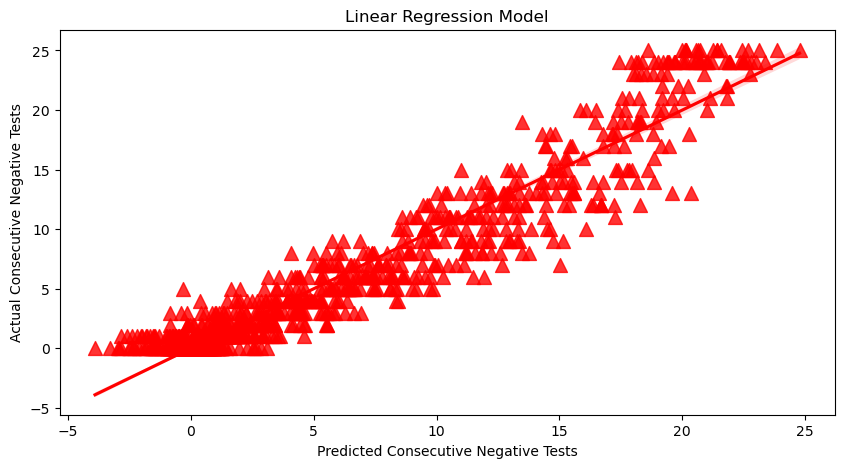

In [10]:
# plot predictions vs actual
fig = sns.regplot(x=y_preds, y=y_train, color='red', marker="^", scatter_kws={"s": 100})
fig.set(title="Linear Regression Model", xlabel="Predicted Consecutive Negative Tests", ylabel="Actual Consecutive Negative Tests")
fig.figure.set_size_inches(10, 5)
plt.show(fig)

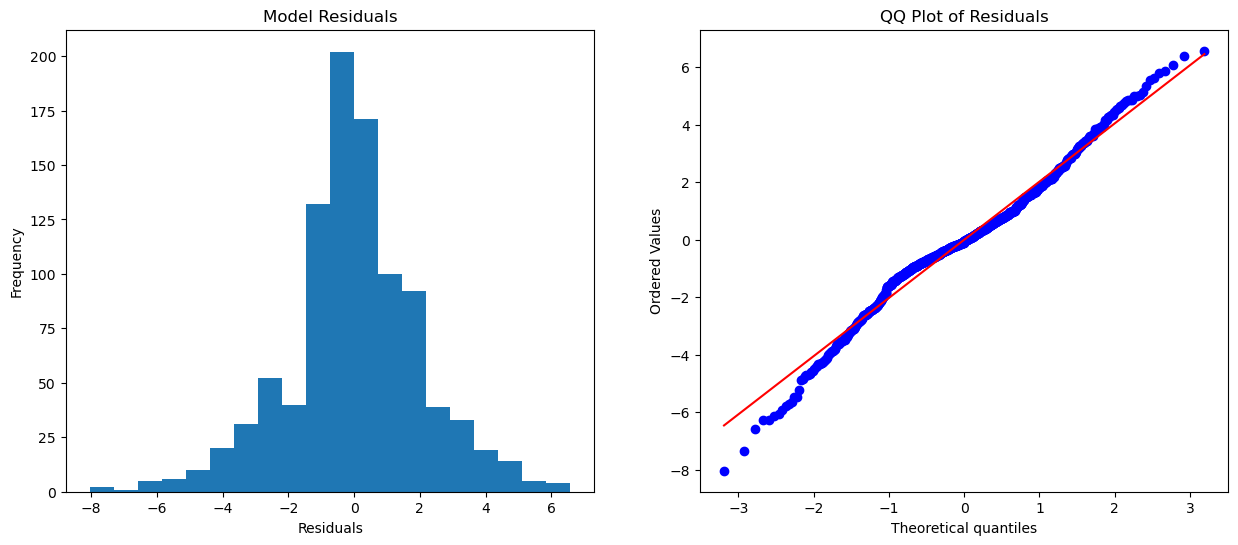

In [13]:
from scipy import stats

# plot residuals to check model assumptions

# Calculate residuals
model_resids = y_train - y_preds

# Calculate residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram of residuals
ax1.hist(model_resids, bins=20)
ax1.set_title('Model Residuals')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Frequency')

# Plot QQ plot of residuals
stats.probplot(model_resids, dist="norm", plot=ax2)
ax2.set_title('QQ Plot of Residuals')

plt.show()
